In [100]:
import logging
import os
import pandas as pd
import json

from pathlib import Path

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.FATAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

from setup import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Track Layout
Calculate the layout of the dutch railway system


In [101]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

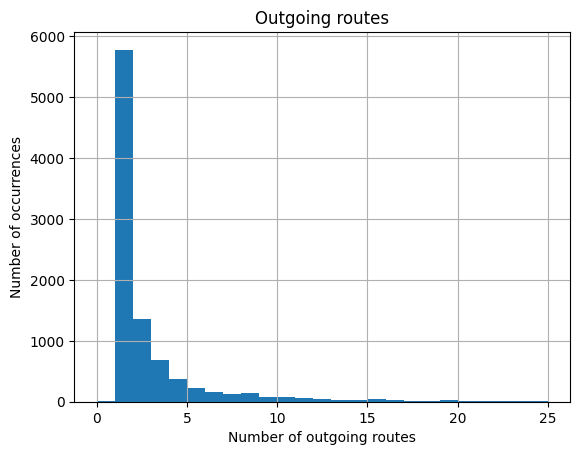

In [102]:
edges_df = pd.DataFrame({"Outgoing routes": [len(n.outgoing) for n in layout.g_block.nodes.values() if len(n.outgoing) <= 25]})
hist = edges_df.hist(bins=25, )
plt.xlabel("Number of outgoing routes")
plt.ylabel("Number of occurrences")
plt.show()

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

In [103]:
scenario_file = "../data/prorail/scenarios/TAD/2025-07-08_1.json"
try:
    base_path = Path(__file__).parent
    file_path = (base_path / scenario_file).resolve()
    data = json.load(open(file_path))
except:
    data = json.load(open(scenario_file))
types = {x["name"]: x for x in data["types"]}
agents = []
for trainNumber, entry in enumerate(data["trains"]):
    trainNumber += 1
    move = entry["movements"][0]
    velocity = types[entry["trainUnitTypes"][0]]["speed"] / 3.6

    block_path = layout.get_path_for_agent(move, trainNumber, velocity)

    agent = Agent(trainNumber, move["startLocation"], move["endLocation"], velocity, move["startTime"],
                  endTime=move["endTime"],
                  startTimeHuman=str(timedelta(seconds=move["startTime"])),
                  endTimeHuman=str(timedelta(seconds=move["endTime"])),
                  blockPath=block_path,
                  trainNumber=entry["trainNumber"],
                  trainUnitTypes=entry["trainUnitTypes"],
                  stops=move["stops"]
    )
    agents.append(agent)

agent_df = pd.DataFrame([agent.__dict__ for agent in agents])
agent_df['blockPathLength'] = agent_df['blockPath'].map(len)

print(f"total blocks in path: {agent_df['blockPathLength'].sum()}")
print(f"total edges in graph: {edges_df['Outgoing routes'].sum()}")

agent_df

total blocks in path: 6234
total edges in graph: 23191


,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,blockPath,trainNumber,trainUnitTypes,stops,blockPathLength
0,1,KLP|1,RTD|8,38.888889,360.0,6960.0,0:06:00,1:56:00,"[r-Ed_Har|944--r-Ed_Har|942, r-Ed_Har|942--r-E...",3234,[VIRM],"[{'expected_arrival': 1500.0, 'location': 'UT|...",139
1,2,GVC|1,DDR|2a,38.888889,2640.0,5880.0,0:44:00,1:38:00,"[r-Gvc|52--r-Gv|232, r-Gv|232--r-Gv|304, r-Gv|...",5243,[SNG],"[{'expected_arrival': 2820.0, 'location': 'GV|...",48
2,3,GVC|2,EHV|1,38.888889,1080.0,6300.0,0:18:00,1:45:00,"[r-Gvc|50--r-Gv|230, r-Gv|230--r-Gv|302, r-Gv|...",1141,[ICD],"[{'expected_arrival': 1260.0, 'location': 'GV|...",94
3,4,VH|2,GVC|11,38.888889,180.0,1980.0,0:03:00,0:33:00,"[r-Ledn_lis|631--r-Ledn_lis|633, r-Ledn_lis|63...",6343,[SLT],"[{'expected_arrival': 540.0, 'location': 'LEDN...",19
4,5,GVC|11,ASS|9,38.888889,540.0,4020.0,0:09:00,1:07:00,"[r-Gvc|5078--r-Laa|84, r-Laa|84--r-Laa|542, r-...",4341,[SLT],"[{'expected_arrival': 720.0, 'location': 'LAA|...",48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,RTD|9,GVC|1,38.888889,300.0,1980.0,0:05:00,0:33:00,"[r-Rtd|278--r-Rtd|178, r-Rtd|178--r-Rmoa_Rtd|1...",5132,[SNG],"[{'expected_arrival': 540.0, 'location': 'SDM|...",28
78,79,GVC|3,DDR|5,38.888889,1500.0,4680.0,0:25:00,1:18:00,"[r-Gvc|48--r-Gv|230, r-Gv|230--r-Gv|304, r-Gv|...",5143,[SNG],"[{'expected_arrival': 1680.0, 'location': 'GV|...",48
79,80,LAA|5,RTD|8,38.888889,180.0,1560.0,0:03:00,0:26:00,"[r-Laa|212--r-Gv|226, r-Gv|226--r-Gv|302, r-Gv...",3228,[VIRM],"[{'expected_arrival': 360.0, 'location': 'GV|4...",29
80,81,RSW|3,GVC|3,38.888889,120.0,780.0,0:02:00,0:13:00,"[r-Dt_Gv|614--r-Dt_Gv|606, r-Dt_Gv|606--r-Gv|3...",5230,[SNG],"[{'expected_arrival': 300.0, 'location': 'GVMW...",5


## Scenario

In [104]:
series_3500o = agent_df.loc[(agent_df['trainNumber'].str.startswith("35", na=False)) & (agent_df['trainNumber'].astype(int) % 2 == 1)].sort_values("start_time")
# This train would be at 2700 at GV|6, we will be replanning its path till ASDZ|2
agent = series_3500o.loc[series_3500o['stops'].map(len).idxmax()]
agent

id                                                                11
origin                                                         DDR|2
destination                                                    VL|1a
velocity                                                   38.888889
start_time                                                     180.0
endTime                                                      12420.0
startTimeHuman                                               0:03:00
endTimeHuman                                                 3:27:00
blockPath          [r-Ddr|1238--r-Ddr|1306, r-Ddr|1306--r-Zwd|131...
trainNumber                                                     3543
trainUnitTypes                                                [VIRM]
stops              [{'expected_arrival': 840.0, 'location': 'RTB|...
blockPathLength                                                  233
Name: 10, dtype: object

In [105]:
# Replan these agents, -1 is planning in a new agent
agent_id = agent['id']
scenario = Scenario(layout, scenario_file)

## Experiment
Define an experiment for every stop, and the original start and stop


In [106]:
stops_df = pd.DataFrame(agent["stops"])
r_start = stops_df.loc[stops_df["location"].str.contains("GV", na=False)]
r_stop  = stops_df.loc[stops_df["location"].str.contains("ASDZ", na=False)]

r_start, r_stop

(   expected_arrival location    time
 4            2400.0     GV|6  2520.0,
    expected_arrival location    time
 8            4860.0   ASDZ|2  4980.0)

In [107]:
i_start = r_start.index[0] + 1
i_stop  = r_stop.index[0]
stops = agent["stops"][i_start:i_stop]

move = {
    "startLocation": r_start["location"].iloc[0],
    "startTime": r_start["time"].iloc[0],
    "endLocation": r_stop["location"].iloc[0],
    "endTime": r_stop["expected_arrival"].iloc[0],
    "stops": stops,
}

block_path = layout.get_path_for_agent(move, agent["trainNumber"], agent["velocity"])

def filter_origin(n):
    return n.split("-")[1].split("|")[0]

allowed_nodes = {filter_origin(block_path[0].from_node.name)}
for e in block_path:
    allowed_nodes.add(filter_origin(e.to_node.name))
allowed_nodes

{'Asdzo',
 'Asra',
 'Asra_Shl',
 'Gv',
 'Gvm',
 'Gvm_Ledn',
 'Hfd',
 'Hfd_Ledn',
 'Hfd_Shl',
 'Laa',
 'Ledn',
 'Shl'}

In [108]:
# Setup experiment
experiment_settings = [
    {
        "start_time": r_start["time"].iloc[0],
        "origin": r_start["location"].iloc[0],
        "destination": r_stop["location"].iloc[0],
        "filter_agents": agent_id,
        "metadata": {
            "offset": 2,
        },
    },
    {
        "start_time": r_start["time"].iloc[0],
        "origin": r_start["location"].iloc[0],
        "destination": r_stop["location"].iloc[0],
        "max_buffer_time": 900,
        "filter_agents": agent_id,
        "metadata": {
            "color": "Green",
            "label": "Buffer time",
            "offset": 1,
        }
    }, {
        "start_time": r_start["time"].iloc[0],
        "origin": r_start["location"].iloc[0],
        "destination": r_stop["location"].iloc[0],
        "max_buffer_time": 900,
        "use_recovery_time": True,
        "filter_agents": agent_id,
        "metadata": {
            "color": "Blue",
            "label": "Recovery time",
        }
    }
]

experiments = setup_experiment(scenario, experiment_settings, default_direction=1)

INFO:pybook.setup:Setting up experiment {'start_time': 2520.0, 'origin': 'GV|6', 'destination': 'ASDZ|2', 'filter_agents': 11, 'metadata': {'offset': 2, 'color': 'Red', 'label': 'No flexibility'}, 'velocity': 38.888888888888886, 'max_buffer_time': 0, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': 2520.0, 'origin': 'GV|6', 'destination': 'ASDZ|2', 'max_buffer_time': 900, 'filter_agents': 11, 'metadata': {'color': 'Green', 'label': 'Buffer time', 'offset': 1}, 'velocity': 38.888888888888886, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': 2520.0, 'origin': 'GV|6', 'destination': 'ASDZ|2', 'max_buffer_time': 900, 'use_recovery_time': True, 'filter_agents': 11, 'metadata': {'color': 'Blue', 'label': 'Recovery time', 'offset': 0}, 'velocity': 38.888888888888886}


### Blocking staircase diagram
Showing the route of the agent with the most stops, its quite long.


C:\Users\erick\Documents\uni\Thesis\delay-replannning\generation\safe_interval_graph.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(timedelta(seconds=ytick)) for ytick in ax.get_yticks()])


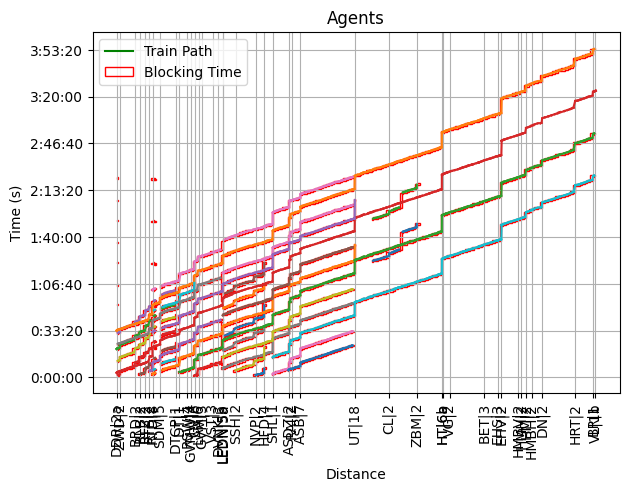

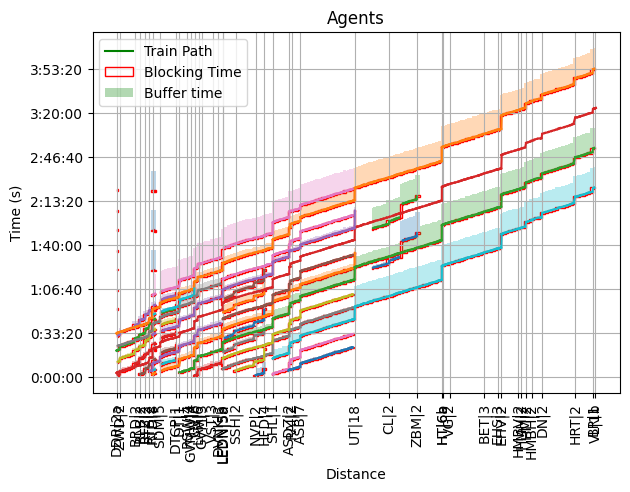

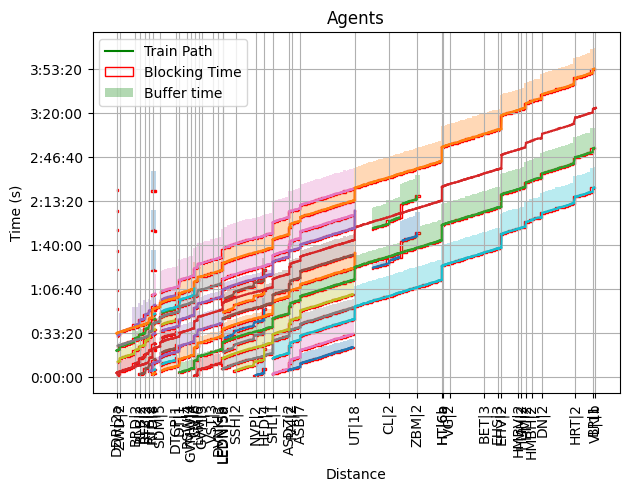

In [109]:
for exp in experiments:
    exp.s.plot(agent_id, exp.block_intervals, exp.buffer_times, exp.recovery_times, True)

In [125]:
timeout = 300
pybooklogger.setLevel(logging.DEBUG)
run_experiments([experiments[2]], timeout, filter_tracks=allowed_nodes)

DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Gv|244 --goal r-Asdzo|764 --edgegraph output --search repeat --startTime 2520.0
DEBUG:pybook.setup:repeat output: ['<0,inf,inf,inf> <-inf,2520,3848.61,3848.61>', '<2520,inf,inf,inf> <2520,2544.19,3848.61,3872.79>', '<2544.19,inf,inf,inf> <-inf,2776.55,4291.64,4291.64>', '<2520,2544.19,3848.61,3872.79> <-inf,2776.55,4291.64,4291.64>', '<2776.55,inf,inf,inf> <-inf,2778.17,4291.64,4291.64>', '<2544.19,2776.55,4291.64,4291.64> <-inf,2778.17,4291.64,4291.64>', '<2520,2544.19,3848.61,3872.79> <-inf,2544.19,4291.64,4291.64>', '<2778.17,inf,inf,inf> <-inf,2778.71,4291.64,4291.64>', '<2776.55,2778.17,4291.64,4291.64> <-inf,2778.71,4291.64,4291.64>', '<2544.19,2776.55,4291.64,4291.64> <-inf,2776.55,4291.64,4291.64>', '<2520,2544.19,3848.61,3872.79> <-inf,2544.19,4291.64,4291.64>', '<2778.71,inf,inf,inf> <-inf,2780.33,4291.64,4291.64>', '<2778.17,2778.71,4291.64,4291.64> <-inf,2780.33,4291.64,4291.64>', '<2776.55,2778.17,4291.64,

## Results


### ATF Plot

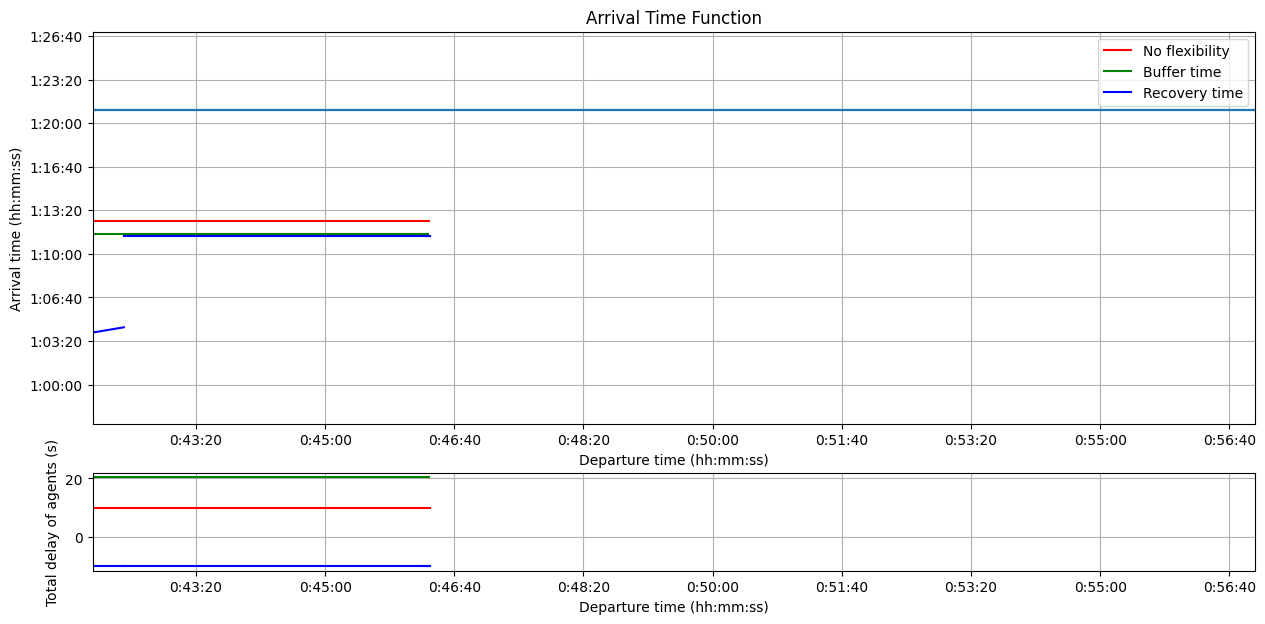

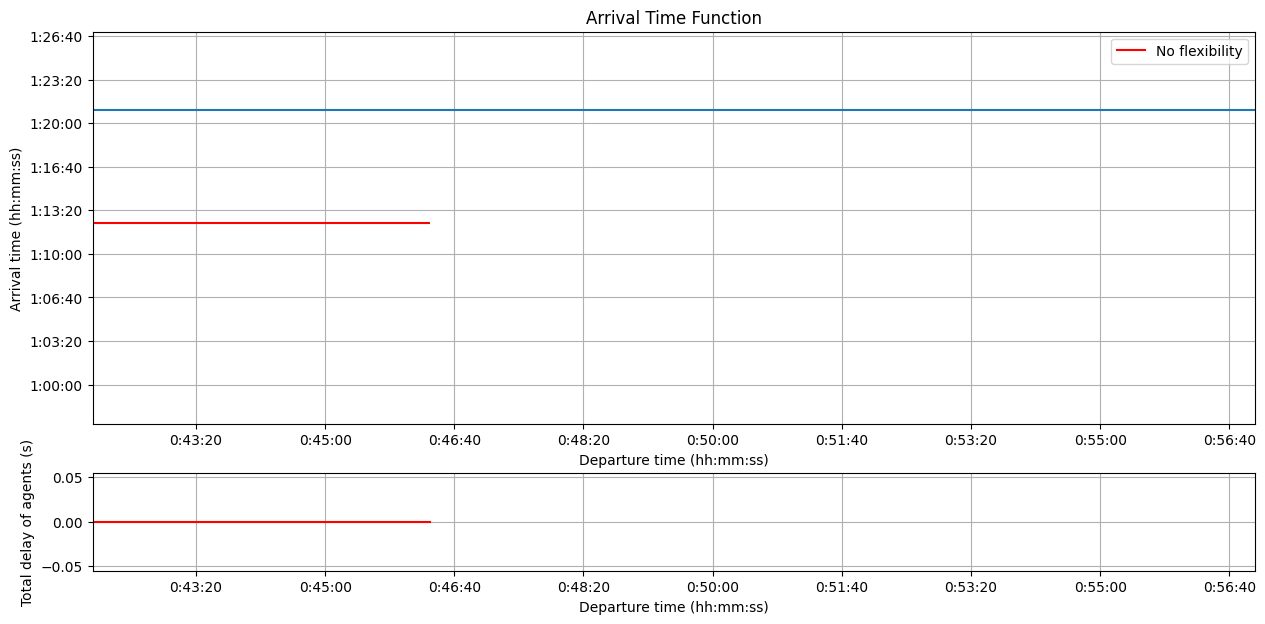

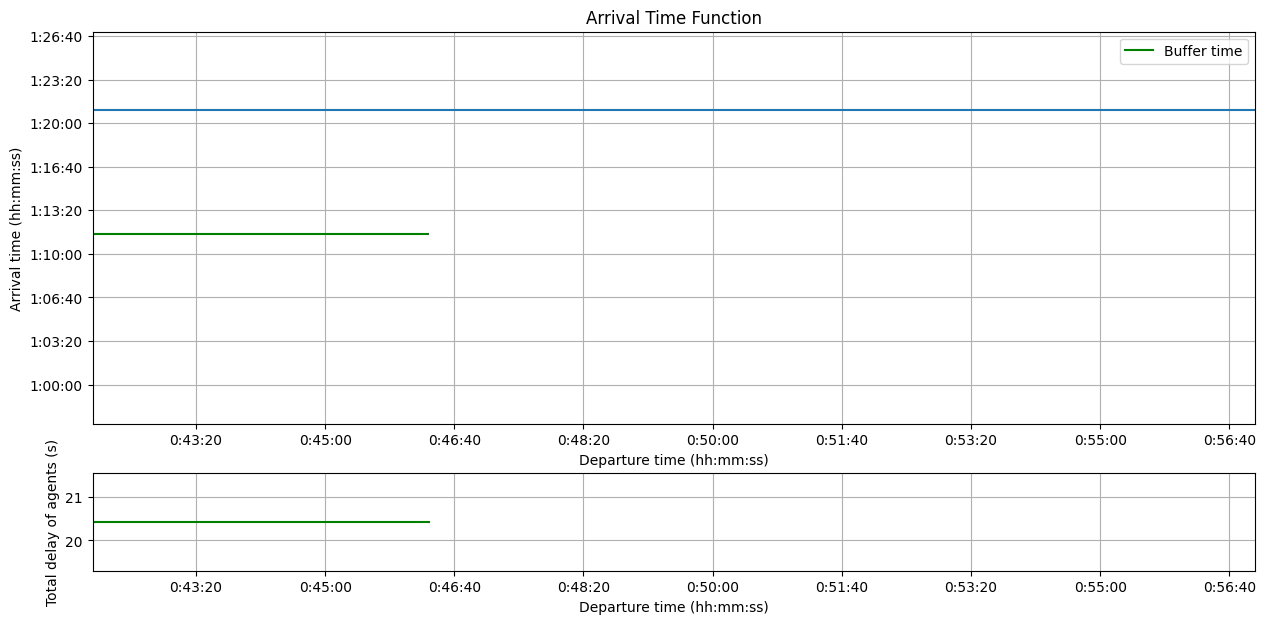

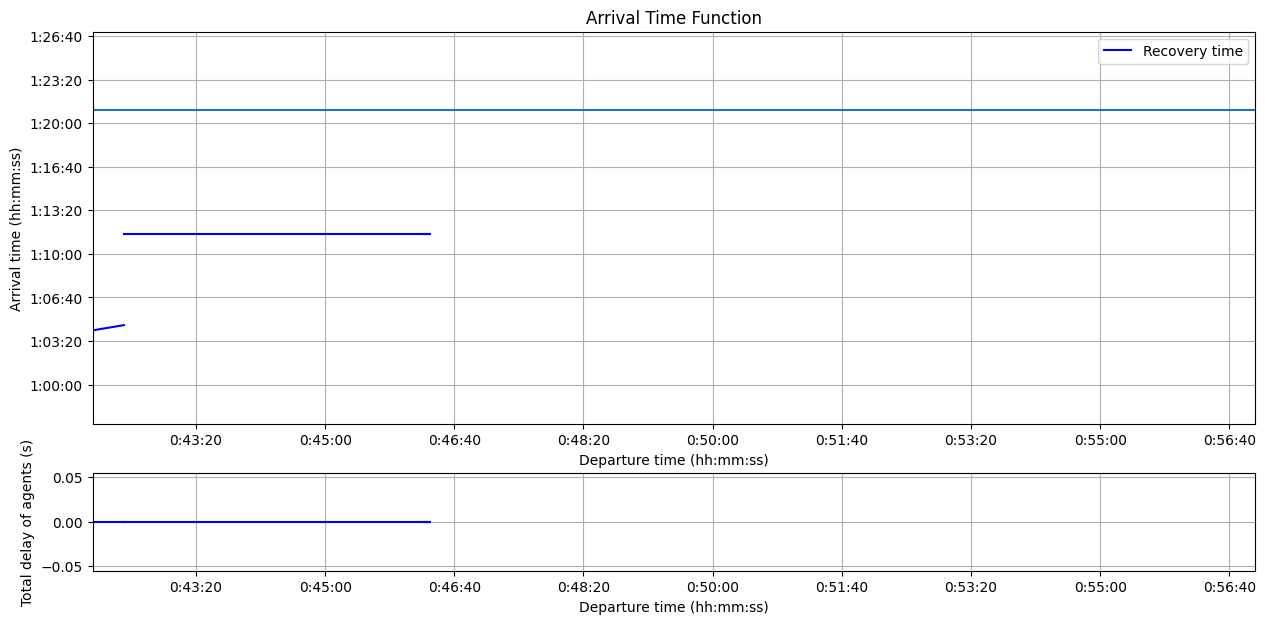

In [126]:
pybooklogger.setLevel(logging.WARNING)
experiments[0].metadata = {'color': 'Red', 'label': 'No flexibility', 'offset': 10}
experiments[1].metadata = {'color': 'Green', 'label': 'Buffer time', 'offset': 0}
experiments[2].metadata = {'color': 'Blue', 'label': 'Recovery time', 'offset': -10}

kwargs = {"min_x": r_start["time"].iloc[0], "max_x": r_start["time"].iloc[0] + 900, "min_y": r_start["time"].iloc[0] + 900, "max_y": r_start["time"].iloc[0] + 2700, "expected_arrival_time": r_stop["expected_arrival"].iloc[0]}
plot_experiments(experiments, **kwargs)

experiments[0].metadata = {'color': 'Red', 'label': 'No flexibility', 'offset': 0}
experiments[1].metadata = {'color': 'Green', 'label': 'Buffer time', 'offset': 0}
experiments[2].metadata = {'color': 'Blue', 'label': 'Recovery time', 'offset': 0}

plot_experiments([experiments[0]], **kwargs)
plot_experiments([experiments[1]], **kwargs)
plot_experiments([experiments[2]], **kwargs)

### Time statistics

In [112]:
def sum_cols(df1, cols, name):
    df2 = df1.drop(columns=cols)
    df2[name] = df1[cols].sum(axis=1)
    return df2

time_df = pd.DataFrame([exp.get_running_time() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

setup_cols = ["track graph creation", "routing graph creation"]
recompute_cols = ["unsafe interval generation", "safe interval generation", "bt and crt generation", "converting routes to blocks"]
search_cols = ["FlexSIPP search time"]

time_df = sum_cols(time_df, setup_cols, "Setup Time")
time_df = sum_cols(time_df, recompute_cols, "Recompute Time")
time_df = sum_cols(time_df, search_cols, "Search Time")
time_df

,Setup Time,Recompute Time,Search Time
No flexibility,67.438534,236.065050,7.293
Buffer time,67.438534,235.538854,14.993
Recovery time,67.438534,235.782153,15.619


### Search Node Statistics


In [113]:
nodes_df = pd.DataFrame([exp.get_complexity() for exp in experiments], index=[exp.metadata['label'] for exp in experiments])

nodes_df

,nodes generated,nodes decreased,nodes expanded
No flexibility,346,53,137
Buffer time,441,59,215
Recovery time,534,33,270


### Output paths found


In [114]:
for key, value in experiments[2].results[3].items():
    delayed_trains = {i: v for i,v in enumerate(value[0][4]) if float(v[0]) > 0}
    print(f"{key.replace('r-', '')}\nearliest departure: {int(min(float(value[0][1]), float(value[0][2])) / 60)}\ndepart before: {int(float(value[0][2]) / 60)}\narrive at: {int((float(value[0][1]) + float(value[0][3])) / 60)}\ndelays trains: {delayed_trains}")

Gv|244;Gv|1822;Laa|1820;Laa|1818;Gvm|190;Gvm|170;Gvm|866;Gvm_Ledn|856;Gvm_Ledn|846;Gvm_Ledn|836;Gvm_Ledn|826;Gvm_Ledn|816;Gvm_Ledn|806;Ledn|1114;Ledn|1066;Ledn|1030;Ledn|1992;Hfd_Ledn|1990;Hfd_Ledn|1986;Hfd_Ledn|1984;Hfd_Ledn|1982;Hfd_Ledn|1980;Hfd_Ledn|1978;Hfd_Ledn|1976;Hfd_Ledn|1974;Hfd_Ledn|1972;Hfd_Ledn|1970;Hfd|1232;Hfd|1212;Hfd|1152;Hfd|1138;Hfd|1118;Hfd_Shl|1776;Hfd_Shl|1762;Shl|1086;Shl|1068;Shl|1062;Shl|1032;Asra_Shl|1740;Asra_Shl|1726;Asra|1308;Asra|1024;Asdzo|704;Asdzo|1404;Asdzo|744;Asdzo|764
earliest departure: 42
depart before: 42
arrive at: 64
delays trains: {56: ['209.505', '233.691', '1437.12'], 72: ['210.852', '235.038', '2012.68']}
Gv|244;Gv|1822;Laa|1820;Laa|1818;Gvm|190;Gvm|170;Gvm|866;Gvm_Ledn|856;Gvm_Ledn|846;Gvm_Ledn|836;Gvm_Ledn|826;Gvm_Ledn|816;Gvm_Ledn|806;Ledn|1114;Ledn|1066;Ledn|1030;Ledn|1992;Hfd_Ledn|1990;Hfd_Ledn|1986;Hfd_Ledn|1984;Hfd_Ledn|1982;Hfd_Ledn|1980;Hfd_Ledn|1978;Hfd_Ledn|1976;Hfd_Ledn|1974;Hfd_Ledn|1972;Hfd_Ledn|1970;Hfd|1232;Hfd|1212;Hfd|115

### Path statistics


In [115]:
for exp in experiments:
    print(f"Differend paths found for {exp.metadata['label']}: {sum(exp.results[2].values())}")

Differend paths found for No flexibility: 1
Differend paths found for Buffer time: 1
Differend paths found for Recovery time: 3
